# Task1 & 2: Data analysis and preprocessing

In [1]:
import pandas as pd
data = pd.read_csv("./Spam_Emails.csv",sep=',')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [2]:
# Count the length of data and to column "length"
data["length"] = data["text"].apply(lambda x: len(x.split()))
#data.sort_values(by='length', ascending=False).head(10) # List top 10 long sentence
data

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,324
1,Subject: the stock trading gunslinger fanny i...,1,89
2,Subject: unbelievable new homes made easy im ...,1,87
3,Subject: 4 color printing special request add...,1,98
4,"Subject: do not have money , get software cds ...",1,52
...,...,...,...
5723,Subject: re : research and development charges...,0,297
5724,"Subject: re : receipts from visit jim , than...",0,244
5725,Subject: re : enron case study update wow ! a...,0,515
5726,"Subject: re : interest david , please , call...",0,276


0    4360
1    1368
Name: spam, dtype: int64


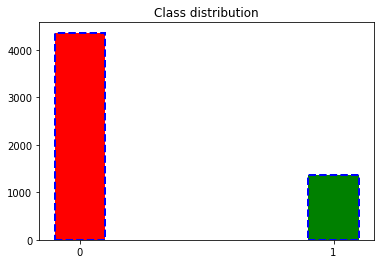

In [3]:
# Plot the distribution of classes
import numpy as np
import matplotlib.pyplot as plt
y_count = data['spam'].value_counts()
print(y_count)
class_list = np.array([0, 1])
plt.bar(class_list, y_count, color=['r', 'g', 'b'], width=0.2, tick_label=class_list,  ec='b', ls='--', lw=2)
plt.title("Class distribution")
plt.show()

Text(0.5, 1.0, 'Sentence length distribution')

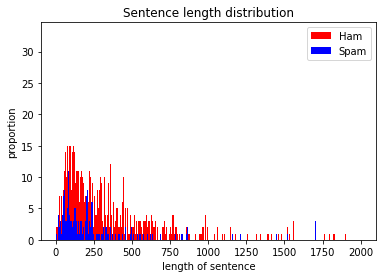

In [4]:
# investigate the distribution of the sentence length
spam_sent = [i for i in data['length'][0:1368] if i!=0]
ham_sent = [i for i in data['length'][1368:] if i!=0]

plt.hist(ham_sent, bins=range(min(ham_sent), 2000, 1), 
              alpha=1, color="red")
plt.hist(spam_sent, bins=range(min(spam_sent), 2000, 1),
              alpha=1, color="blue")
labels = ['Ham',"Spam"]
plt.legend(labels)
plt.xlabel("length of sentence")
plt.ylabel("proportion")
plt.title("Sentence length distribution")

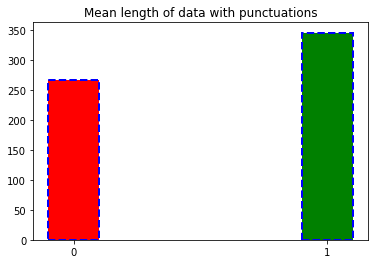

Average sentence length of Spam are 266.0 words
Average sentence of Ham are 346.0 words
Average sentence of dataset are 327.0 words


In [5]:
# calculate the average length of the spam and ham sentence 

mean_length = [None,None]
mean_length[0] = np.mean(data['length'][0:1368]) # with class of 1
mean_length[1] = np.mean(data['length'][1368:]) #with class of 0
plt.bar(class_list, mean_length, color=['r', 'g', 'b'], width=0.2, tick_label=class_list,  ec='b', ls='--', lw=2)
plt.title("Mean length of data with punctuations")
plt.show()
print("Average sentence length of Spam are {} words".format(round(mean_length[0],0)))
print("Average sentence of Ham are {} words".format(round(mean_length[1],0)))
print("Average sentence of dataset are {} words".format(round(np.mean(data["length"]),0)))

In [6]:
data['text'].str.split(' ', expand=True).stack().value_counts()

            177976
-           105222
.            92494
,            61143
the          50110
             ...  
nested           1
pointers         1
7896             1
2310             1
desiring         1
Length: 37442, dtype: int64

## Remove punctuations and lower the letter

In [7]:
# lower the letter and remove the punctuations
import string
def remove_punctuations_and_lower(text):
    for punctuation in string.punctuation:
        text = text.lower()
        text = text.replace(punctuation, '')
    return text
    
# update the cleaned_text and their lengthes
data["text_cleaned"] = data['text'].apply(remove_punctuations_and_lower)
data["length"] = data["text_cleaned"].apply(lambda x: len(x.split()))
data

,text,spam,length,text_cleaned
0,Subject: naturally irresistible your corporate...,1,189,subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,1,89,subject the stock trading gunslinger fanny is...
2,Subject: unbelievable new homes made easy im ...,1,80,subject unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,74,subject 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,40,subject do not have money get software cds fr...
...,...,...,...,...
5723,Subject: re : research and development charges...,0,185,subject re research and development charges t...
5724,"Subject: re : receipts from visit jim , than...",0,174,subject re receipts from visit jim thanks ...
5725,Subject: re : enron case study update wow ! a...,0,339,subject re enron case study update wow all ...
5726,"Subject: re : interest david , please , call...",0,164,subject re interest david please call shi...


In [8]:
# count the unique words in each category
word_counts = data['text_cleaned'].str.split(' ', expand=True).stack().value_counts()
word_counts_spam = data["text_cleaned"][0:1368].str.split(' ', expand=True).stack().value_counts()
word_counts_ham = data["text_cleaned"][1368:].str.split(' ', expand=True).stack().value_counts()
print("The unique words of spam: {}, of ham: {}, and of the whole dataset: {}".format(word_counts_spam.size,word_counts_ham.size,word_counts.size))

The unique words of spam: 18828, of ham: 27122, and of the whole dataset: 37380


Text(0, 0.5, 'counts')

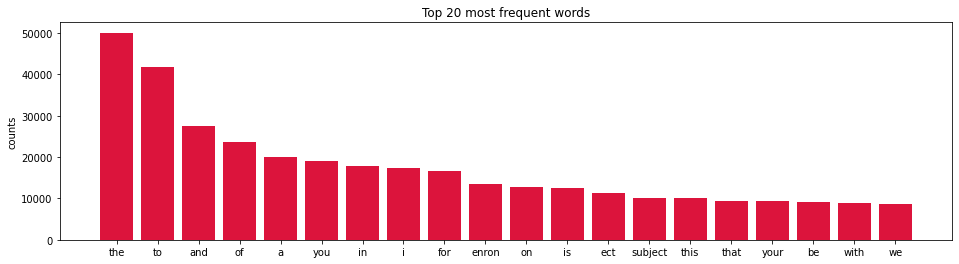

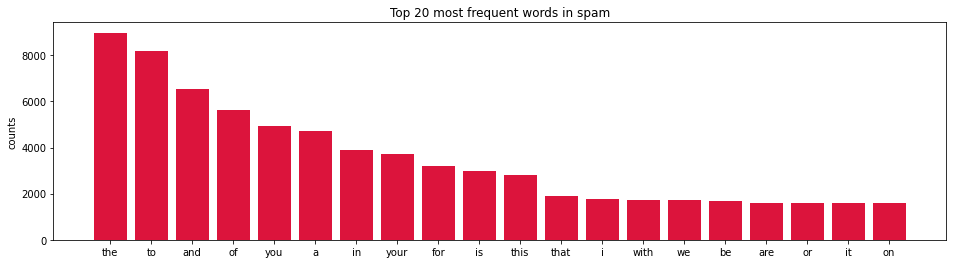

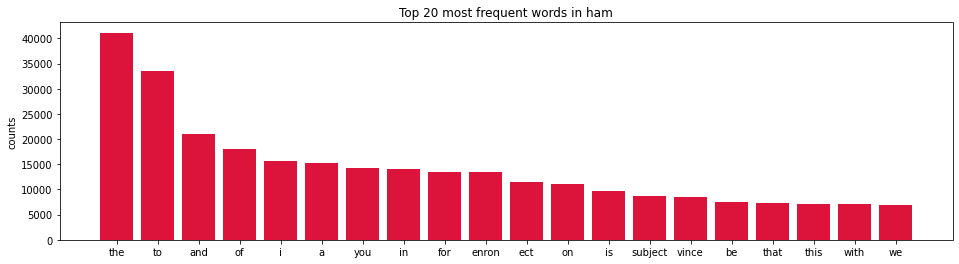

In [9]:
# word_counts[1:21] # Leave out the counts of whitespace and plot top 20 frenquent words

plt.figure(figsize=(16,4))
plt.bar(word_counts[1:21].index, word_counts[1:21], color='crimson')
plt.title("Top 20 most frequent words")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_spam[1:21].index, word_counts_spam[1:21], color='crimson')
plt.title("Top 20 most frequent words in spam")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_ham[1:21].index, word_counts_ham[1:21], color='crimson')
plt.title("Top 20 most frequent words in ham")
plt.ylabel("counts")

As can be seen from the plot graph, the stop words show most frequent in the sentence. So it is necessary to strip the stop words from the sentences.

## Remove the stopwords and digital numbers

In [10]:
# remove the stop words and digital numbers
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
def clean_stopwords_digits(text):
  text = ' '.join(word for word in text.split() if word not in stopwords)
  text = ''.join(i for i in text if not i.isdigit())
  return text

# update the cleaned text and their lengthes
data["text_cleaned"] = data['text_cleaned'].apply(clean_stopwords_digits)
data["length"] = data["text_cleaned"].apply(lambda x: len(x.split()))
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,spam,length,text_cleaned
0,Subject: naturally irresistible your corporate...,1,113,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,64,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,40,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,46,subject color printing special request additi...
4,"Subject: do not have money , get software cds ...",1,19,subject money get software cds software compat...
...,...,...,...,...
5723,Subject: re : research and development charges...,0,106,subject research development charges gpg forwa...
5724,"Subject: re : receipts from visit jim , than...",0,119,subject receipts visit jim thanks invitation v...
5725,Subject: re : enron case study update wow ! a...,0,188,subject enron case study update wow day super ...
5726,"Subject: re : interest david , please , call...",0,97,subject interest david please call shirley cre...


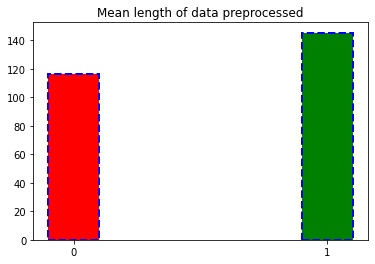

Average sentence length of Spam are 117.0 words
Average sentence of Ham are 145.0 words
Average sentence of dataset are 139.0 words


In [11]:
# statistical information of preprocessed data
mean_length = [None,None]
mean_length[0] = np.mean(data['length'][0:1368]) # with class of 1
mean_length[1] = np.mean(data['length'][1368:]) #with class of 0
plt.bar(class_list, mean_length, color=['r', 'g', 'b'], width=0.2, tick_label=class_list,  ec='b', ls='--', lw=2)
plt.title("Mean length of data preprocessed")
plt.show()
print("Average sentence length of Spam are {} words".format(round(mean_length[0],0)))
print("Average sentence of Ham are {} words".format(round(mean_length[1],0)))
print("Average sentence of dataset are {} words".format(round(np.mean(data["length"]),0)))

In [12]:
# count the unique words after preprocessing
word_counts = data['text_cleaned'].str.split(' ', expand=True).stack().value_counts()
word_counts_spam = data["text_cleaned"][0:1368].str.split(' ', expand=True).stack().value_counts()
word_counts_ham = data["text_cleaned"][1368:].str.split(' ', expand=True).stack().value_counts()
print("The unique words of spam: {}, of ham: {}, and of the whole dataset: {}".format(word_counts_spam.size,word_counts_ham.size,word_counts.size))

The unique words of spam: 17316, of ham: 24078, and of the whole dataset: 33604


Text(0, 0.5, 'counts')

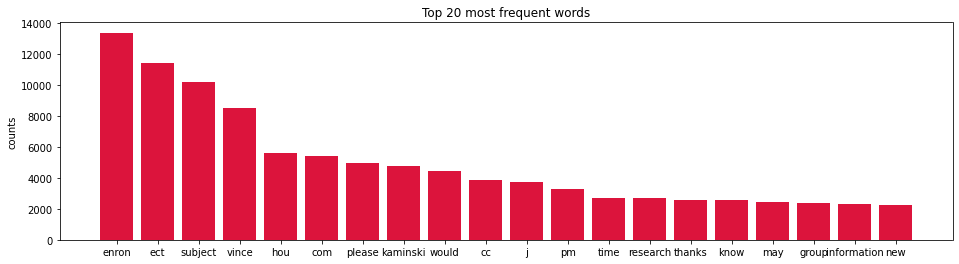

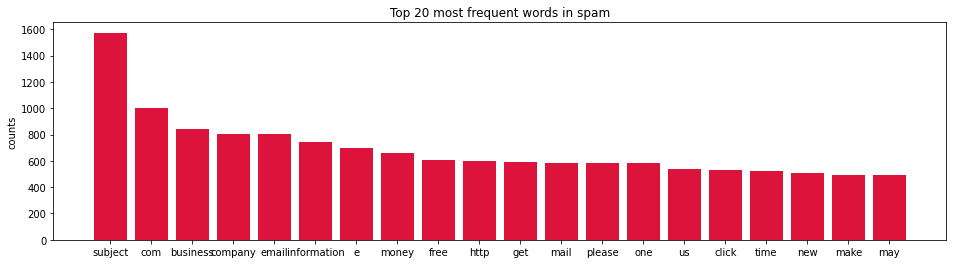

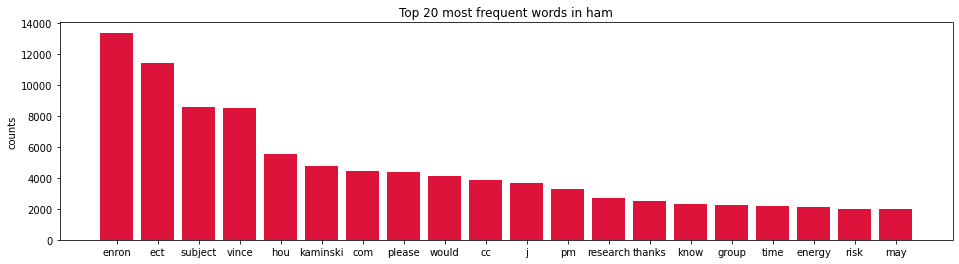

In [13]:

plt.figure(figsize=(16,4))
plt.bar(word_counts[1:21].index, word_counts[1:21], color='crimson')
plt.title("Top 20 most frequent words")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_spam[1:21].index, word_counts_spam[1:21], color='crimson')
plt.title("Top 20 most frequent words in spam")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_ham[1:21].index, word_counts_ham[1:21], color='crimson')
plt.title("Top 20 most frequent words in ham")
plt.ylabel("counts")

In [14]:
word_counts

             89687
enron        13382
ect          11418
subject      10179
vince         8532
             ...  
filth            1
polemic          1
pqe              1
offertory        1
desiring         1
Length: 33604, dtype: int64

## Remove the top 20 frequent words and infrequent words

In [15]:
# Remove the top 20 frequent words and the words with frequent<=2
FREQWORDS = set([w for w in word_counts[1:21].index])
UNFREQWORDS = set([w for w in word_counts[15500:].index])
def remove_freqwords(text):
    return " ".join([word for word in text.split() if word not in FREQWORDS])
def remove_unfreqwords(text):
    return " ".join([word for word in text.split() if word not in UNFREQWORDS])   
# update the cleaned text and their lengthes
data["text_cleaned"] = data['text_cleaned'].apply(remove_freqwords)
data["text_cleaned"] = data['text_cleaned'].apply(remove_unfreqwords)
data["length"] = data["text_cleaned"].apply(lambda x: len(x.split()))
data

,text,spam,length,text_cleaned
0,Subject: naturally irresistible your corporate...,1,111,naturally irresistible corporate identity lt r...
1,Subject: the stock trading gunslinger fanny i...,1,26,stock trading merrill like try kansas yes tigh...
2,Subject: unbelievable new homes made easy im ...,1,35,unbelievable homes made easy im wanting show h...
3,Subject: 4 color printing special request add...,1,36,color printing special request additional clic...
4,"Subject: do not have money , get software cds ...",1,16,money get software cds software compatibility ...
...,...,...,...,...
5723,Subject: re : research and development charges...,0,58,development charges gpg forwarded shirley cren...
5724,"Subject: re : receipts from visit jim , than...",0,103,receipts visit jim invitation visit lsu shirle...
5725,Subject: re : enron case study update wow ! a...,0,164,case study update wow day super thank much com...
5726,"Subject: re : interest david , please , call...",0,45,interest david call shirley crenshaw assistant...


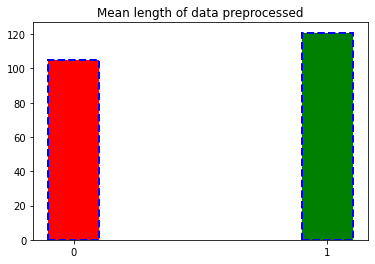

Average sentence length of Spam are 105.0 words
Average sentence of Ham are 121.0 words
Average sentence of dataset are 117.0 words


In [16]:
# statistical information of preprocessed data
mean_length = [None,None]
mean_length[0] = np.mean(data['length'][0:1368]) # with class of 1
mean_length[1] = np.mean(data['length'][1368:]) #with class of 0
plt.bar(class_list, mean_length, color=['r', 'g', 'b'], width=0.2, tick_label=class_list,  ec='b', ls='--', lw=2)
plt.title("Mean length of data preprocessed")
plt.show()
print("Average sentence length of Spam are {} words".format(round(mean_length[0],0)))
print("Average sentence of Ham are {} words".format(round(mean_length[1],0)))
print("Average sentence of dataset are {} words".format(round(np.mean(data["length"]),0)))

In [17]:
word_counts = data['text_cleaned'].str.split(' ', expand=True).stack().value_counts()
word_counts_spam = data["text_cleaned"][0:1368].str.split(' ', expand=True).stack().value_counts()
word_counts_ham = data["text_cleaned"][1368:].str.split(' ', expand=True).stack().value_counts()
print("The unique words of spam: {}, of ham: {}, and of the whole dataset: {}".format(word_counts_spam.size,word_counts_ham.size,word_counts.size))

The unique words of spam: 9048, of ham: 13730, and of the whole dataset: 15480


Text(0, 0.5, 'counts')

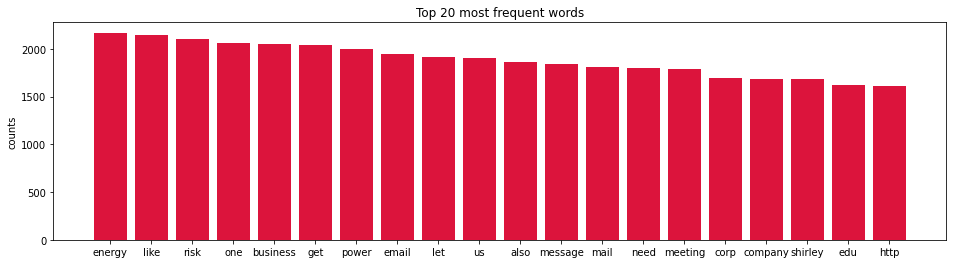

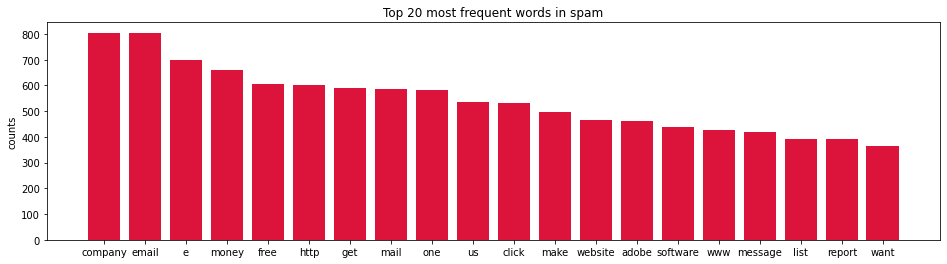

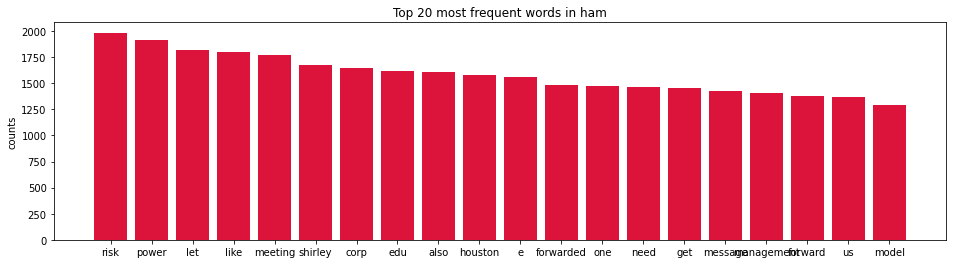

In [18]:
plt.figure(figsize=(16,4))
plt.bar(word_counts[1:21].index, word_counts[1:21], color='crimson')
plt.title("Top 20 most frequent words")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_spam[1:21].index, word_counts_spam[1:21], color='crimson')
plt.title("Top 20 most frequent words in spam")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_ham[1:21].index, word_counts_ham[1:21], color='crimson')
plt.title("Top 20 most frequent words in ham")
plt.ylabel("counts")

In [19]:
data.sort_values(by='length', ascending=False).head(10)

,text,spam,length,text_cleaned
1380,Subject: from the enron india newsdesk - april...,0,3879,india newsdesk april th newsclips fyi news art...
2650,Subject: from the enron india newsdesk - april...,0,3867,india newsdesk april th newsclips fyi news art...
2338,Subject: from the enron india newsdesk - april...,0,2416,india newsdesk april rd newsclips sound articl...
2560,Subject: from the enron india newsdesk - may 5...,0,2238,india newsdesk newsclips stinson news articles...
536,Subject: make thousands just sending emails . ...,1,2182,make thousands sending emails easy yahoo earn ...
151,Subject: industry giants can ' t match this op...,1,2069,industry giants match opportunity another grou...
49,"Subject: breaking biotech news hey , i though...",1,1674,breaking biotech news hey thought might want t...
126,Subject: investment op in proven nasa technolo...,1,1671,investment op proven nasa technology hey thoug...
1594,Subject: from the enron india newsdesk - may 4...,0,1486,india newsdesk th newsclips stinson news artic...
1359,"Subject: the government grants you $ 25 , 000 ...",1,1485,government grants free personal business grant...


# Task 3: Text classification
Now, it is time to start training!

In [20]:
# to compare the performance, we define X_uncleaned as original text
X = data['text_cleaned']
y = data['spam']
X_uncleaned = data['text']

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify_with_Count(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy with CountVectorizer:', pipeline_model.score(x_test, y_test)*100)
    y_pred = pipeline_model.predict(x_test)
    
    print(classification_report(y_test, y_pred))
    print(pd.crosstab(y_test, y_pred))
def classify_with_Tfid(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', TfidfVectorizer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy with TfidVevtorizer:', pipeline_model.score(x_test, y_test)*100)
    y_pred = pipeline_model.predict(x_test)
    
    print(classification_report(y_test, y_pred))
    print(pd.crosstab(y_test, y_pred))

In [22]:
# naive Bayes model with cleaned text
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify_with_Count(model, X, y)
print("----------------------------------------------")
classify_with_Tfid(model, X, y)

Accuracy with CountVectorizer: 98.77835951134381
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.96      0.99      0.97       274

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

col_0    0    1
spam           
0      862   10
1        4  270
----------------------------------------------
Accuracy with TfidVevtorizer: 95.72425828970331
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       872
           1       1.00      0.82      0.90       274

    accuracy                           0.96      1146
   macro avg       0.97      0.91      0.94      1146
weighted avg       0.96      0.96      0.96      1146

col_0    0    1
spam           
0      871    1
1       48  226


In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify_with_Count(model, X_uncleaned, y)
print("----------------------------------------------")
classify_with_Tfid(model, X_uncleaned, y)

Accuracy with CountVectorizer: 99.21465968586386
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.97      1.00      0.98       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

col_0    0    1
spam           
0      864    8
1        1  273
----------------------------------------------
Accuracy with TfidVevtorizer: 86.64921465968587
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       872
           1       1.00      0.44      0.61       274

    accuracy                           0.87      1146
   macro avg       0.93      0.72      0.77      1146
weighted avg       0.89      0.87      0.85      1146

col_0    0    1
spam           
0      872    0
1      153  121


Now turn to the feed forward training

In [24]:
vectorizer = TfidfVectorizer()
X_data = vectorizer.fit_transform(X)
X_data = X_data.toarray()
x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [25]:
from keras.models import Sequential
from keras import layers

input_dim = x_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
    
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
               metrics=['accuracy',f1_metric])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                154540    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 154,551
Trainable params: 154,551
Non-trainable params: 0
_________________________________________________________________


In [26]:
import tensorflow as tf
def scheduler(epoch, lr):
        if epoch < 5:
            return lr
        else:
            return lr * tf.math.exp(-0.1)
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3), 
                    tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]

In [27]:
history = model.fit(x_train, y_train,epochs=5, validation_data=(x_test, y_test), batch_size= 20)

Epoch 1/5
230/230 [==============================] - 5s 5ms/step - loss: 0.5297 - accuracy: 0.9166 - f1_metric: 0.7345 - val_loss: 0.3442 - val_accuracy: 0.9825 - val_f1_metric: 0.9535
Epoch 2/5
230/230 [==============================] - 1s 4ms/step - loss: 0.2129 - accuracy: 0.9939 - f1_metric: 0.9815 - val_loss: 0.1470 - val_accuracy: 0.9904 - val_f1_metric: 0.9738
Epoch 3/5
230/230 [==============================] - 1s 4ms/step - loss: 0.0887 - accuracy: 0.9972 - f1_metric: 0.9881 - val_loss: 0.0829 - val_accuracy: 0.9921 - val_f1_metric: 0.9786
Epoch 4/5
230/230 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9989 - f1_metric: 0.9804 - val_loss: 0.0568 - val_accuracy: 0.9930 - val_f1_metric: 0.9799
Epoch 5/5
230/230 [==============================] - 1s 4ms/step - loss: 0.0273 - accuracy: 0.9996 - f1_metric: 0.9951 - val_loss: 0.0433 - val_accuracy: 0.9939 - val_f1_metric: 0.9818


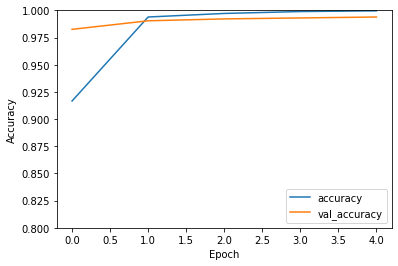

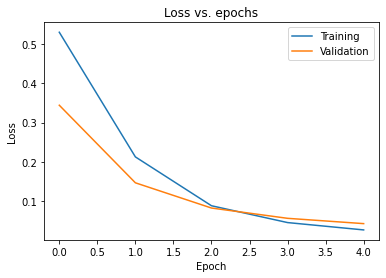

In [28]:
from matplotlib import pyplot as plt 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [29]:
# postprocessing and compute f1 score
y_pred = model.predict(x_test)
y_pred_bool = np.round(y_pred).astype(int).flatten()
print(classification_report(y_test, y_pred_bool))
pd.crosstab(y_test, y_pred_bool)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       872
           1       0.99      0.98      0.99       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



col_0,0,1
spam,,
0,870,2
1,5,269


In [30]:
from keras.preprocessing.text import Tokenizer
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])


[2, 68, 575, 10, 185, 238, 39, 68, 9, 881, 904, 30, 1196, 64, 364]


In [31]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 1000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [32]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 50)          763700    
                                                                 
 flatten (Flatten)           (None, 50000)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                500010    
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,263,721
Trainable params: 1,263,721
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9998
Testing Accuracy:  0.9878


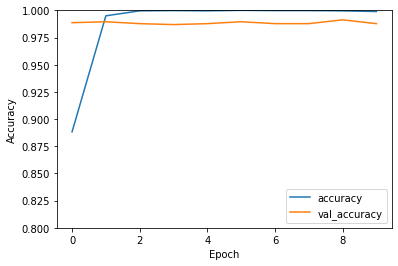

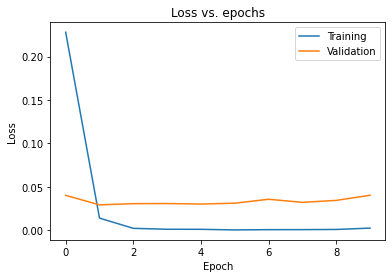

In [34]:
from matplotlib import pyplot as plt 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [35]:
# postprocessing and compute f1 score
y_pred = model.predict(X_test)
y_pred_bool = np.round(y_pred).astype(int).flatten()
print(classification_report(y_test, y_pred_bool))
pd.crosstab(y_test, y_pred_bool)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       872
           1       0.99      0.96      0.97       274

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



col_0,0,1
spam,,
0,868,4
1,10,264


# Task 4: PMI based word similarity

In [36]:
from collections import Counter
from itertools import combinations
from math import log
import matplotlib.pyplot as plt
import numpy as np
from pprint import pformat
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, norm
from string import punctuation

In [37]:
data

,text,spam,length,text_cleaned
0,Subject: naturally irresistible your corporate...,1,111,naturally irresistible corporate identity lt r...
1,Subject: the stock trading gunslinger fanny i...,1,26,stock trading merrill like try kansas yes tigh...
2,Subject: unbelievable new homes made easy im ...,1,35,unbelievable homes made easy im wanting show h...
3,Subject: 4 color printing special request add...,1,36,color printing special request additional clic...
4,"Subject: do not have money , get software cds ...",1,16,money get software cds software compatibility ...
...,...,...,...,...
5723,Subject: re : research and development charges...,0,58,development charges gpg forwarded shirley cren...
5724,"Subject: re : receipts from visit jim , than...",0,103,receipts visit jim invitation visit lsu shirle...
5725,Subject: re : enron case study update wow ! a...,0,164,case study update wow day super thank much com...
5726,"Subject: re : interest david , please , call...",0,45,interest david call shirley crenshaw assistant...


In [38]:
punctrans = str.maketrans(dict.fromkeys(punctuation))
def tokenize(text):
    return text.split() # Return tokenized.

texts_tokenized = data['text_cleaned'].apply(tokenize)

In [39]:
%%time
cx = Counter()
cxy = Counter()
for text in texts_tokenized:
    for x in text:
        cx[x] += 1
    for x, y in map(sorted, combinations(text, 2)):
        cxy[(x, y)] += 1
print('%d tokens' % len(cx))
print('Most common:', cx.most_common()[:25])

15479 tokens
Most common: [('e', 2256), ('energy', 2170), ('like', 2147), ('risk', 2107), ('one', 2059), ('business', 2049), ('get', 2044), ('power', 1998), ('email', 1952), ('let', 1916), ('us', 1908), ('also', 1864), ('message', 1847), ('mail', 1806), ('need', 1796), ('meeting', 1785), ('corp', 1692), ('company', 1682), ('shirley', 1681), ('edu', 1627), ('http', 1609), ('houston', 1582), ('forward', 1574), ('management', 1532), ('market', 1525)]
CPU times: user 1min 31s, sys: 639 ms, total: 1min 32s
Wall time: 1min 31s


In [40]:
%%time
for x, y in list(cxy.keys()):
    if x not in cx or y not in cx:
        del cxy[(x, y)]
x2i, i2x = {}, {}
for i, x in enumerate(cx.keys()):
    x2i[x] = i
    i2x[i] = x
sx = sum(cx.values())
sxy = sum(cxy.values())

CPU times: user 2.98 s, sys: 6.19 ms, total: 2.98 s
Wall time: 2.98 s


In [41]:
%%time
pmi_samples = Counter()
datas, rows, cols = [], [], []
for (x, y), n in cxy.items():
    rows.append(x2i[x])
    cols.append(x2i[y])
    datas.append(log((n / sxy) / (cx[x] / sx) / (cx[y] / sx)))
    pmi_samples[(x, y)] = datas[-1]
PMI = csc_matrix((datas, (rows, cols)))
print('%d non-zero elements' % PMI.count_nonzero())
print('Sample PMI values\n', pformat(pmi_samples.most_common()[:10]))

10927369 non-zero elements
Sample PMI values
 [(('spamcop', 'uri'), 8.253321562101977),
 (('surbl', 'uri'), 8.253321562101977),
 (('bjefladghikm', 'uri'), 8.253321562101977),
 (('blacklisted', 'uri'), 8.253321562101977),
 (('spamcop', 'surbl'), 8.253321562101977),
 (('bjefladghikm', 'spamcop'), 8.253321562101977),
 (('blacklisted', 'spamcop'), 8.253321562101977),
 (('bjefladghikm', 'surbl'), 8.253321562101977),
 (('blacklisted', 'surbl'), 8.253321562101977),
 (('bjefladghikm', 'blacklisted'), 8.253321562101977)]
CPU times: user 31.7 s, sys: 1.42 s, total: 33.1 s
Wall time: 33 s


In [42]:
pd.DataFrame.sparse.from_spmatrix(PMI)

,0,1,2,3,4,5,6,7,8,9,...,15469,15470,15471,15472,15473,15474,15475,15476,15477,15478
0,2.708144,0.000000,0.000000,0.000000,0.000000,1.057085,0.000000,3.648151,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.480733,0.000000,0.000000,0.000000,4.852124,2.220235,0.000000,5.034446,0.00000,1.616719,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.986494,2.372789,1.956087,0.426878,0.357886,0.271528,0.293347,0.540207,0.00000,0.805090,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.356168,3.742462,0.000000,1.311044,1.727559,-0.093400,0.000000,1.909881,0.00000,-1.189392,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.465830,0.000000,0.000000,0.000000,2.549539,1.954532,0.000000,4.768743,0.00000,1.351016,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.022184,...,0.0,0.0,0.0,0.0,0.0,7.337031,0.000000,8.253322,0.000000,0.000000
15475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.51873,2.022184,...,0.0,0.0,0.0,0.0,0.0,8.253322,7.272492,8.253322,0.000000,0.000000
15476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,7.377853,0.000000,0.000000
15477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,7.272492,0.000000


In [43]:
U, _, _ = svds(PMI, k=20)

norms = np.sqrt(np.sum(np.square(U), axis=1, keepdims=True))
U /= np.maximum(norms, 1e-7)

In [44]:
k = 5
for x in ['get','power','email','us','message','need','meeting','computer','houston','market','value','program',
              'business','colombia','collection','forecast','addition','voice','american','statement']:
    dd = np.dot(U, U[x2i[x]]) # Cosine similarity for this unigram against all others.
    s = ''

    for i in np.argpartition(-1 * dd, k + 1)[:k + 1]:
        if i2x[i] == x: continue
        s += '(%s, %.3lf) ' % (i2x[i], dd[i])
    print('%s, %d\n %s' % (x, cx[x], s))
    print('-' * 10)

get, 2044
 (instructions, 0.828) (ever, 0.798) (idea, 0.818) (free, 0.870) (keep, 0.830) 
----------
power, 1998
 (officials, 0.937) (possibility, 0.961) (plant, 0.915) (pointed, 0.909) (payment, 0.897) 
----------
email, 1952
 (never, 0.791) (happen, 0.721) (grand, 0.706) (addresses, 0.717) (maybe, 0.705) 
----------
us, 1908
 (since, 0.948) (two, 0.936) (steps, 0.894) (though, 0.886) (three, 0.885) 
----------
message, 1847
 (xpress, 0.651) (hardware, 0.718) (introduce, 0.674) (hi, 0.649) (look, 0.645) 
----------
need, 1796
 (give, 0.859) (professional, 0.847) (personal, 0.842) (mine, 0.755) (limited, 0.752) 
----------
meeting, 1785
 (london, 0.861) (ii, 0.834) (informed, 0.809) (kohli, 0.805) (meanwhile, 0.796) 
----------
computer, 337
 (directions, 0.845) (emails, 0.904) (copy, 0.837) (friend, 0.853) (e, 0.816) 
----------
houston, 1582
 (friday, 0.750) (ronn, 0.736) (lunch, 0.721) (jan, 0.718) (ehud, 0.703) 
----------
market, 1525
 (markets, 0.777) (november, 0.745) (pool, 0.7

Additional for task 4

In [45]:
from collections import defaultdict
def co_occurrence(sentences, window_size):
    d = defaultdict(int)
    vocab = set()
    for text in sentences:
        # preprocessing (use tokenizer instead)
        #text = text.lower().split()
        # iterate over sentences
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1

    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df

In [46]:
text = texts_tokenized
df = co_occurrence(text, 3)
df

,,,,,,,,,,aa,...,zulkifli,zum,zuma,zunaechst,zur,zusaetzlich,zwabic,zwischen,zymg,zzzz
,160,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,7,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,3,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zusaetzlich,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zwabic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zwischen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zymg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
def pmi(df):
    col_totals = df.sum(axis=0)
    total = col_totals.sum()
    row_totals = df.sum(axis=1)
    expected = np.outer(row_totals, col_totals) / total
    df = df / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        df = np.log(df)
    df[np.isinf(df)] = 0.0  # log(0) = 0
    return df

In [48]:
ppmi = pmi(df)
ppmi

,,,,,,,,,,aa,...,zulkifli,zum,zuma,zunaechst,zur,zusaetzlich,zwabic,zwischen,zymg,zzzz
,3.096126,0.000000,0.000000,0.000000,3.607639,2.259566,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
,0.000000,0.000000,8.894221,0.000000,8.606539,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
,0.000000,8.894221,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
,0.000000,0.000000,0.000000,8.169437,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
,3.607639,8.606539,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zusaetzlich,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
zwabic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
zwischen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
zymg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# Bonus Task: Textual similarity


## 1. Distilbert pre-trained model

In [49]:
!pip install transformers --quiet
!pip install datasets --quiet

In [50]:
# Download the dataset
import datasets
from datasets import load_dataset, load_from_disk
dataset = load_dataset('csv', data_files={'train': 'Spam_Emails.csv'})
dataset

Using custom data configuration default-024d0014d12f63af
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-024d0014d12f63af/0.0.0/51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'spam'],
        num_rows: 5728
    })
})

In [51]:
# Split the dataset
split_datasets = dataset["train"].train_test_split(train_size=0.8, seed=20)
split_datasets

Loading cached split indices for dataset at /root/.cache/huggingface/datasets/csv/default-024d0014d12f63af/0.0.0/51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58/cache-224cb2914f21295b.arrow and /root/.cache/huggingface/datasets/csv/default-024d0014d12f63af/0.0.0/51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58/cache-f5378a473587c0cc.arrow


DatasetDict({
    train: Dataset({
        features: ['text', 'spam'],
        num_rows: 4582
    })
    test: Dataset({
        features: ['text', 'spam'],
        num_rows: 1146
    })
})

In [52]:
# Tokenize the dataset 
from transformers import AutoTokenizer
 
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
def tokenize_function(examples):

    model_inputs = tokenizer(examples["text"], max_length=512, truncation=True)
    model_inputs["labels"] = examples['spam']
    return model_inputs
 
tokenized_datasets = split_datasets.map(tokenize_function, batched=True)

Parameter 'function'=<function tokenize_function at 0x7f6b9ec967a0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [53]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'spam', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 4582
    })
    test: Dataset({
        features: ['text', 'spam', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1146
    })
})

In [54]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [55]:
from transformers import AutoModelForSequenceClassification
checkpoint = "distilbert-base-cased"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classifier

In [56]:
import numpy as np
from datasets import load_metric
 
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")
  
   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   return {"accuracy": accuracy, "f1": f1}

In [57]:
from transformers import TrainingArguments, Trainer
 
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    save_strategy="epoch", 
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

trainer.train()
trainer.evaluate()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: spam, text. If spam, text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 4582
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 574


Step,Training Loss
500,0.082600


Saving model checkpoint to ./results/checkpoint-287
Configuration saved in ./results/checkpoint-287/config.json
Model weights saved in ./results/checkpoint-287/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-287/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-287/special_tokens_map.json
Saving model checkpoint to ./results/checkpoint-574
Configuration saved in ./results/checkpoint-574/config.json
Model weights saved in ./results/checkpoint-574/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-574/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-574/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: spam, text. If spam, text are not expected by `DistilBertForSequenceClassification.forward`,  

{'epoch': 2.0,
 'eval_accuracy': 0.9921465968586387,
 'eval_f1': 0.9826589595375722,
 'eval_loss': 0.026658983901143074,
 'eval_runtime': 11.6271,
 'eval_samples_per_second': 98.563,
 'eval_steps_per_second': 6.192}

## 2. Robeta pre-trained model

In [58]:
# Tokenize the dataset 
from transformers import AutoTokenizer
 
tokenizer2 = AutoTokenizer.from_pretrained("roberta-base")
def tokenize_function(examples):

    model_inputs = tokenizer(examples["text"], max_length=512, truncation=True)
    model_inputs["labels"] = examples['spam']
    return model_inputs
 
tokenized_datasets2 = split_datasets.map(tokenize_function, batched=True)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 1,
  "use_cach

In [59]:
from transformers import DataCollatorWithPadding
data_collator2 = DataCollatorWithPadding(tokenizer=tokenizer2)

In [60]:
from transformers import AutoModelForSequenceClassification
checkpoint2 = "roberta-base"
model2 = AutoModelForSequenceClassification.from_pretrained(checkpoint2, num_labels=2)

loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file https://huggingface.co/roberta-base/r

In [61]:
from transformers import TrainingArguments, Trainer
 
training_args2 = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    save_strategy="epoch", 
    weight_decay=0.01,
)

trainer2 = Trainer(
    model=model2,
    args=training_args2,
    train_dataset=tokenized_datasets2["train"],
    eval_dataset=tokenized_datasets2["test"],
    tokenizer=tokenizer2,
    compute_metrics=compute_metrics,
    data_collator=data_collator2,
)

trainer2.train()
trainer2.evaluate()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: spam, text. If spam, text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 4582
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total trai

Step,Training Loss
500,0.319000
1000,0.142300
1500,0.058500


Saving model checkpoint to ./results/checkpoint-573
Configuration saved in ./results/checkpoint-573/config.json
Model weights saved in ./results/checkpoint-573/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-573/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-573/special_tokens_map.json
Saving model checkpoint to ./results/checkpoint-1146
Configuration saved in ./results/checkpoint-1146/config.json
Model weights saved in ./results/checkpoint-1146/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-1146/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-1146/special_tokens_map.json
Saving model checkpoint to ./results/checkpoint-1719
Configuration saved in ./results/checkpoint-1719/config.json
Model weights saved in ./results/checkpoint-1719/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-1719/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-1719/special_toke

{'epoch': 3.0,
 'eval_accuracy': 0.9912739965095986,
 'eval_f1': 0.9807692307692307,
 'eval_loss': 0.049749407917261124,
 'eval_runtime': 21.9082,
 'eval_samples_per_second': 52.309,
 'eval_steps_per_second': 6.573}